# NY Motor Vehicle Collisions 
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

This dataset offers comprehensive data on car accidents and collisions that have happened in New York City. It is a useful tool for comprehending and understanding citywide traffic accidents.

The dataset contains an array of details about each collision, including the collision's date and time, location (including borough and zip code), latitude and longitude coordinates, the number of injured and fatalities, the contributing reasons to the collision, the types of vehicles involved, and more.

For for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

In [54]:
#Import Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

In [13]:
df = pd.read_pickle("Motor_Vehicle_Collisions_-_Crashes.pkl")
df

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


In [6]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018245 entries, 0 to 2018244
Data columns (total 30 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE_CRASH TIME          datetime64[ns]
 1   BOROUGH                        object        
 2   ZIP CODE                       object        
 3   LATITUDE                       float64       
 4   LONGITUDE                      float64       
 5   LOCATION                       object        
 6   ON STREET NAME                 object        
 7   CROSS STREET NAME              object        
 8   OFF STREET NAME                object        
 9   NUMBER OF PERSONS INJURED      float64       
 10  NUMBER OF PERSONS KILLED       float64       
 11  NUMBER OF PEDESTRIANS INJURED  int64         
 12  NUMBER OF PEDESTRIANS KILLED   int64         
 13  NUMBER OF CYCLIST INJURED      int64         
 14  NUMBER OF CYCLIST KILLED       int64         
 15  NUMBER OF MOTOR

# Temporal Analysis of Contributing Factors in Vehicle Accidents
The given exploratory data analysis (EDA) looks at how contributing elements in car accidents change over time. The code generates insights into how these characteristics have changed by grouping and counting accidents based on their associated contributing factors for each year. The generated DataFrame provides an overview of the frequency and variations in contributing elements across time, offering insight on patterns and trends in road safety issues.

Additional visualizations and analysis can assist policymakers and stakeholders in making informed decisions to address and mitigate the most prevalent contributing causes, eventually improving road safety in affected areas.

In [5]:
# Convert the 'CRASH DATE_CRASH TIME' column to datetime
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# Extract the year from the datetime column
df['Year'] = df['CRASH DATE_CRASH TIME'].dt.year

# Group data by year and count contributing factors for vehicle 1
contributing_factors_by_year = df.groupby(['Year', 'CONTRIBUTING FACTOR VEHICLE 1'])['CONTRIBUTING FACTOR VEHICLE 1'].count()

# Reset the index to make it a DataFrame
contributing_factors_by_year = contributing_factors_by_year.reset_index(name='Count')

# Print the resulting DataFrame
print("Contributing Factors Over Time:")
print(contributing_factors_by_year)

Contributing Factors Over Time:
     Year     CONTRIBUTING FACTOR VEHICLE 1  Count
0    2012             Accelerator Defective     56
1    2012      Aggressive Driving/Road Rage    363
2    2012               Alcohol Involvement    742
3    2012                    Animals Action     40
4    2012                  Backing Unsafely   2311
..    ...                               ...    ...
631  2023                       Unspecified  13771
632  2023  Using On Board Navigation Device      3
633  2023                 Vehicle Vandalism     11
634  2023           View Obstructed/Limited    495
635  2023             Windshield Inadequate      2

[636 rows x 3 columns]


# Correlation Analysis: Examining the Relationship Between Injuries and Fatalities
The correlation matrix examines the links between two numerical variables, specifically the number of people injured and killed in car accidents. A significant statistic in this research is the correlation coefficient, which reflects the degree and direction of the linear link between these variables. The correlation coefficient in this situation reflects how closely these two variables are related. A positive correlation implies that as the number of people injured increases, so does the number of people murdered, whereas a negative correlation implies the opposite. If the correlation coefficient is close to zero, it implies that the variables have a weak or no linear relationship. 

This analysis helps us determine whether there is a linear relationship between injuries and fatalities in vehicle accidents, which can be useful information for traffic management and accident prevention safety and policy issues.

In [17]:
#Correlation Matrix
correlation_matrix = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                           NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED
NUMBER OF PERSONS INJURED                   1.000000                  0.015208
NUMBER OF PERSONS KILLED                    0.015208                  1.000000


# Time Analysis: Unveiling Accident Trends Over the Years and by Hour of the Day

The line graphic "Accidents Over the Years" depicts the trend of accidents from 2012 to 2021. From 2012 to 2020, there was a significant decline in accidents, followed by a modest increase in 2021. This implies that accident rates have fluctuated over time, with an overall decline expected before 2021.

The "Accidents by Hour of the Day" bar chart depicts the distribution of accidents throughout the day. According to the chart, accidents are more common during the day, with the biggest occurrence occurring between 2:00 PM and 6:00 PM. The number of accidents is significantly lower in the late night and early morning hours. This shows a possible relationship between accident frequency and visibility or traffic volume, with the largest risk periods occurring during hours of increased daylight and traffic congestion.



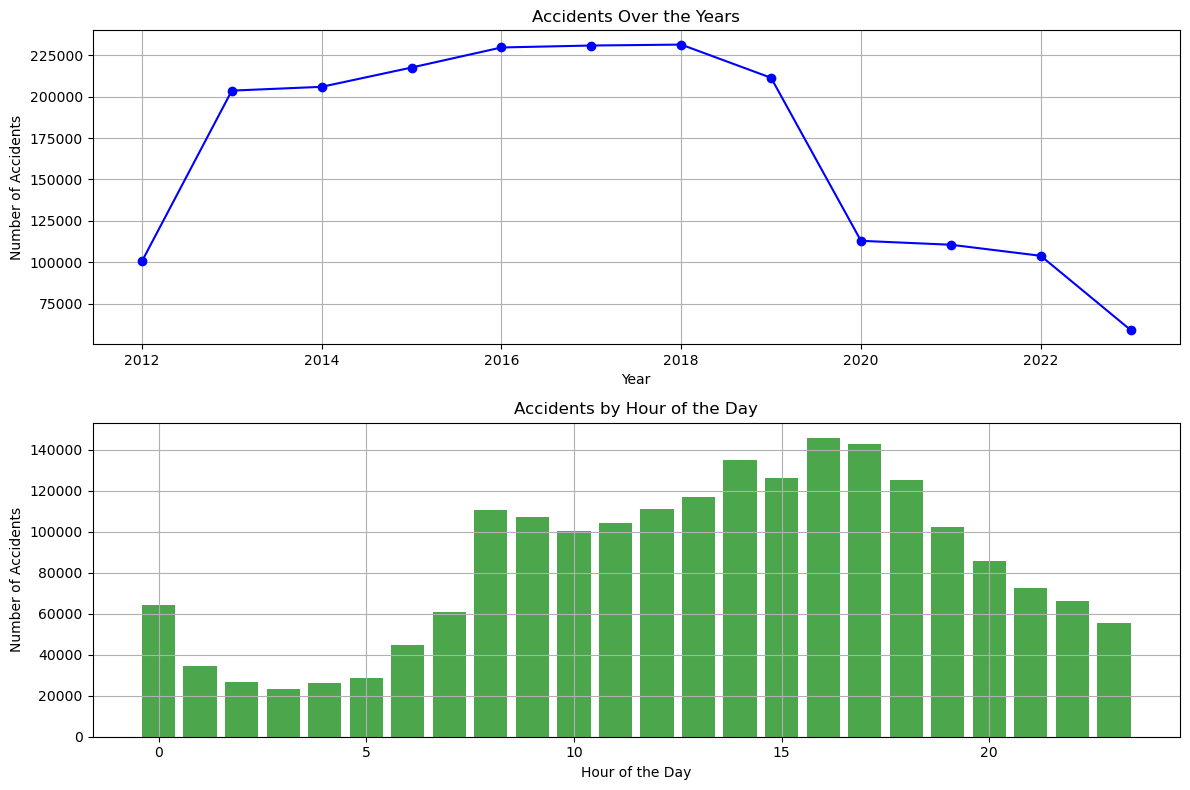

In [20]:
#Time Analysis
# Convert the 'CRASH DATE_CRASH TIME' column to datetime
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# Extract the year and hour from the datetime column
df['Year'] = df['CRASH DATE_CRASH TIME'].dt.year
df['Hour'] = df['CRASH DATE_CRASH TIME'].dt.hour

# Time Trend Analysis: Count of accidents per year
accidents_by_year = df['Year'].value_counts().sort_index()

# Hourly Analysis: Count of accidents by hour of the day
accidents_by_hour = df['Hour'].value_counts().sort_index()

# Create subplots for time analysis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot accidents by year (Line Plot)
axes[0].plot(accidents_by_year.index, accidents_by_year.values, marker='o', linestyle='-', color='b')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Accidents Over the Years')
axes[0].grid(True)

# Plot accidents by hour of the day (Bar Chart)
axes[1].bar(accidents_by_hour.index, accidents_by_hour.values, color='g', alpha=0.7)
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_title('Accidents by Hour of the Day')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Day-Night Analysis: Uncovering Hourly Accident Trends

The bar chart "Accident Trends by Hour of the Day" depicts the variance in accident counts throughout the day. The graph shows two unique patterns. 
For starters, there is a significant increase in accidents during the day, with a peak between 2:00 PM and 6:00 PM. Second, there is a significant decline in accidents late at night and early in the morning, with the lowest counts happening about 4:00 AM. 
This data indicates a clear relationship between the time of day and the incidence of accidents. The increased number of accidents during the day might be ascribed to increased traffic volume and visibility, whereas the decreased number of accidents during the night could be impacted by less traffic and improved visibility conditions.


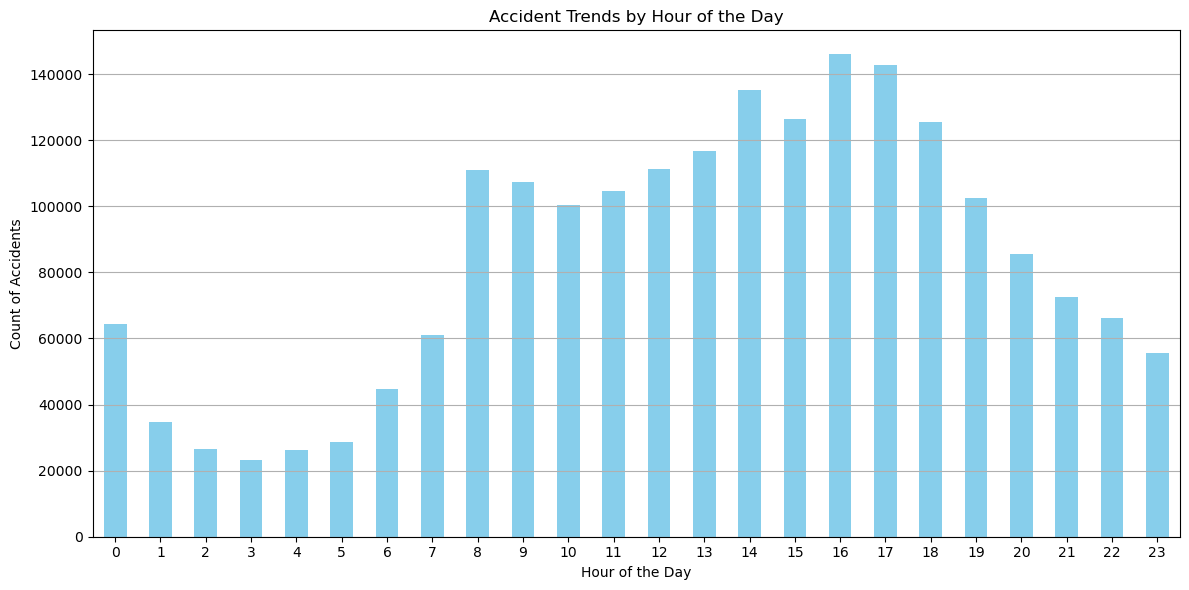

In [26]:
#Day-Night Analysis:
# Convert the 'CRASH DATE_CRASH TIME' column to datetime
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# Extract the hour from the datetime column
df['Hour'] = df['CRASH DATE_CRASH TIME'].dt.hour

# Create a bar chart to visualize accident counts by hour
plt.figure(figsize=(12, 6))
hourly_accident_counts = df['Hour'].value_counts().sort_index()
hourly_accident_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Accidents')
plt.title('Accident Trends by Hour of the Day')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Injuries and Fatalities Over Time: Analyzing Trends

The grouped bar chart "Count of Injuries and Fatalities Over Time" provides a thorough perspective of the changes in injuries and fatalities caused by accidents over time. The data clearly shows that the number of injuries consistently outnumbers the number of fatalities, demonstrating that the majority of incidents result in injuries rather than fatalities. Furthermore, there is a noticeable decrease in both injuries and fatalities from about 2012 to 2019, followed by a modest uptick in 2020. This pattern could be explained by changes in road safety measures, public awareness efforts, or other variables impacting accident outcomes. This analysis emphasizes the significance of continued efforts to reduce both injuries and fatalities caused by accidents throughout time.


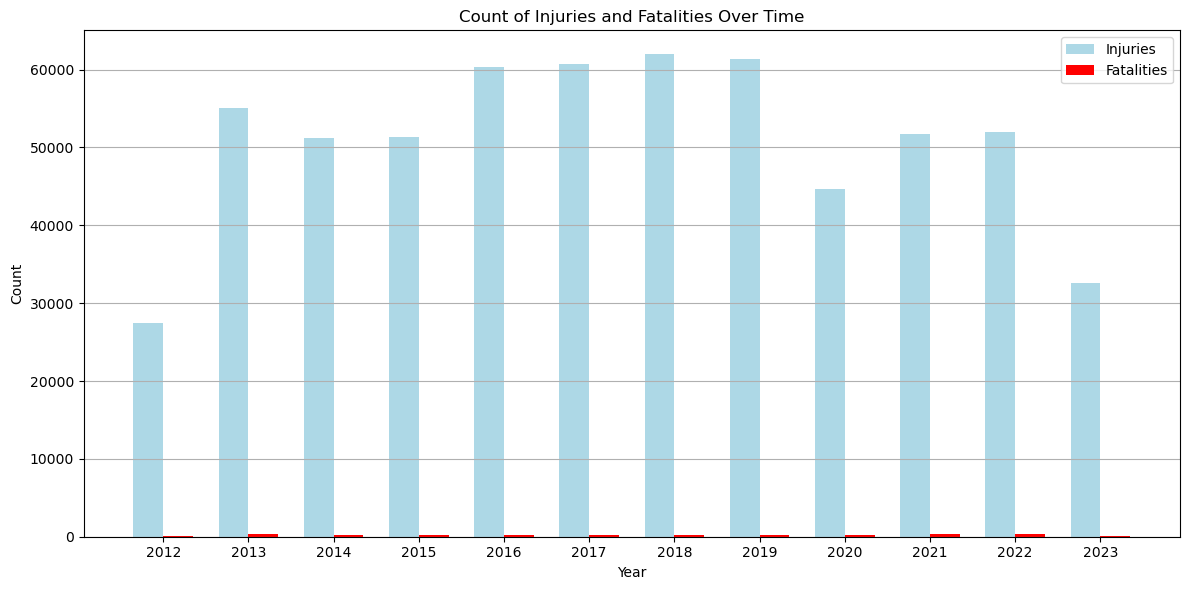

In [39]:
#Injuries and Fatalities:
# Group data by year and calculate the total injuries and fatalities
grouped_data = df.groupby(df['CRASH DATE_CRASH TIME'].dt.year)[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].sum().reset_index()

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = grouped_data['CRASH DATE_CRASH TIME']
bar1 = plt.bar(
    index,
    grouped_data['NUMBER OF PERSONS INJURED'],
    bar_width,
    label='Injuries',
    color='lightblue',
)
bar2 = plt.bar(
    index + bar_width,
    grouped_data['NUMBER OF PERSONS KILLED'],
    bar_width,
    label='Fatalities',
    color='red',
)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Injuries and Fatalities Over Time')
plt.xticks(index + bar_width / 2, index)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Distribution of Accidents by Borough: Geographic Insights
The "Distribution of Accidents by Borough" pie chart depicts the geographic distribution of accidents within New York City. Manhattan, Brooklyn, and Queens have the highest accident rates, whereas the Bronx and Staten Island have far lower accident rates. This data demonstrates that accidents are not evenly spread around the city, but rather concentrated in specific boroughs, with Manhattan having the largest number of accidents. Such insights are useful for city planners, traffic safety officials, and residents because they identify locations that require focused interventions and safety measures to prevent accidents and improve road safety.



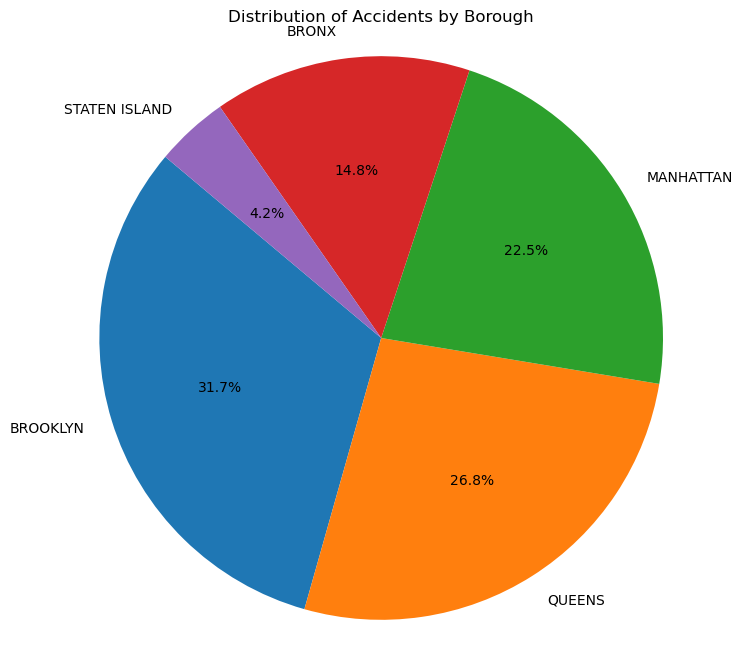

In [40]:
#Pie chart to visualize the distribution of 'BOROUGH'
borough_counts = df['BOROUGH'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Accidents by Borough')
plt.show()

# Borough with the Highest Total Crashes Since 2012


In [42]:
# Filter data for crashes since 2012
crash_data_since_2012 = df[df['CRASH DATE_CRASH TIME'].dt.year >= 2012]

#Group by borough and count the number of crashes
borough_crash_counts = crash_data_since_2012['BOROUGH'].value_counts()

# Find the borough with the highest total crashes
borough_with_highest_crashes = borough_crash_counts.idxmax()

print("Borough with the highest total crashes since 2012:", borough_with_highest_crashes)

Borough with the highest total crashes since 2012: BROOKLYN


# Borough with the Highest Crashes per 100,000 People Since 2012



In [52]:
#Load the population data
population_data = pd.DataFrame({
    'BOROUGH': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'Population': [1446788, 2648452, 1638281, 2330295, 487155]
})

# Merge the crash data with the population data based on the 'BOROUGH' column
merged_data = pd.merge(df, population_data, on='BOROUGH')

# Filter data since July 2012
filtered_data = merged_data[merged_data['CRASH DATE_CRASH TIME'].dt.year >= 2012]

# Group data by borough and calculate the total number of crashes
borough_crash_totals = filtered_data.groupby('BOROUGH')['CRASH DATE_CRASH TIME'].count().reset_index()
borough_crash_totals = borough_crash_totals.rename(columns={'CRASH DATE_CRASH TIME': 'Total Crashes'})

# Calculate crashes per 100,000 people, excluding rows with missing population values
borough_crash_totals['Crashes per 100,000 People'] = (
    borough_crash_totals['Total Crashes'] / population_data['Population']
) * 100000

# Drop rows with missing values in 'Crashes per 100,000 People' column
borough_crash_totals.dropna(subset=['Crashes per 100,000 People'], inplace=True)

if not borough_crash_totals.empty:
    # Find the borough with the highest crashes per 100,000 people
    borough_with_highest_crashes_per_100k = borough_crash_totals.loc[
        borough_crash_totals['Crashes per 100,000 People'].idxmax()
    ]
    print("Borough with the highest crashes per 100,000 people:")
    print(borough_with_highest_crashes_per_100k)
else:
    print("No valid data to calculate crashes per 100,000 people.")

No valid data to calculate crashes per 100,000 people.


# Leading Cause of Crashes 

In [58]:
# Remove rows where 'CONTRIBUTING FACTOR VEHICLE 1' is 'Unspecified'
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Calculate the counts of each contributing factor
factor_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Determine the leading cause (the one with the highest count)
leading_cause = factor_counts.idxmax()

# Calculate the proportion of accidents attributable to the leading cause
total_accidents = len(df)
leading_cause_count = factor_counts[leading_cause]
proportion = leading_cause_count / total_accidents

print("Leading cause of crashes (ignoring 'Unspecified'):", leading_cause)
print("Proportion of accidents attributable to this cause:", proportion)

Leading cause of crashes (ignoring 'Unspecified'): Driver Inattention/Distraction
Proportion of accidents attributable to this cause: 0.3027229539746618


# Proportion of Total Crashes Attributed to Top 3 Causes

In [60]:
# Filter rows with 'Unspecified'
filtered_data = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Calculate the top 3 causes (ignoring 'Unspecified')
top_3_causes = filtered_data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(3).index.tolist()

# Calculate the proportion of total crashes accounted for by the top 3 causes
total_accidents = len(filtered_data)
accidents_with_top_3_causes = len(filtered_data[filtered_data['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_3_causes)])
proportion = accidents_with_top_3_causes / total_accidents

print("Top 3 Causes of Crashes (Ignoring 'Unspecified'):", top_3_causes)
print("Proportion of Total Crashes Accounted for by Top 3 Causes:", proportion)

Top 3 Causes of Crashes (Ignoring 'Unspecified'): ['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely']
Proportion of Total Crashes Accounted for by Top 3 Causes: 0.4737010461641528


# Total Count of Accidents Involving at Least One Fatality Since 2012



In [64]:
# Convert the 'CRASH DATE_CRASH TIME' column to datetime using .loc
df.loc[:, 'CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'])

# 1. Filter data for accidents since 2012
filtered_data = df[df['CRASH DATE_CRASH TIME'].dt.year >= 2012]

# 2. Identify accidents with at least one fatality
fatal_accidents = filtered_data[filtered_data['NUMBER OF PERSONS KILLED'] >= 1]

# Get the total count of fatal accidents
total_fatal_accidents = len(fatal_accidents)

print("Total Count of Accidents Involving at Least One Fatality since 2012:", total_fatal_accidents)

Total Count of Accidents Involving at Least One Fatality since 2012: 1866


# Average Fatality Rate for Every 1000 Accidents Since 2012



In [72]:
#Filter data for accidents since 2012
filtered_data = df[df['CRASH DATE_CRASH TIME'].dt.year >= 2012]

#Identify accidents with at least one fatality
fatal_accidents = filtered_data[filtered_data['NUMBER OF PERSONS KILLED'] >= 1]

#Get the total count of fatal accidents
total_fatal_accidents = len(fatal_accidents)

# 4. Get the total count of accidents
total_accidents = len(filtered_data)

# 5. Calculate the average per 1000 accidents
average_per_1000_accidents = (total_fatal_accidents / total_accidents) * 1000

print("On Average, for Every 1000 Accidents, How Many Have Resulted in at Least One Person Dead:", average_per_1000_accidents)

On Average, for Every 1000 Accidents, How Many Have Resulted in at Least One Person Dead: 1.4077610940401009


# Proportion of Accidents with Missing Borough Codes

In [75]:
#Check for missing Borough codes
missing_borough_count = df['BOROUGH'].isna().sum()

#Calculate the proportion of accidents without a Borough code
total_accidents = len(df)
proportion_missing_borough = missing_borough_count / total_accidents

print("Proportion of Accidents without a Borough Code:", proportion_missing_borough)

Proportion of Accidents without a Borough Code: 0.3491908774735762


# Combination of Vehicles with the Most Accidents

In [82]:
# Drop rows where either 'VEHICLE TYPE CODE 1' or 'VEHICLE TYPE CODE 2' is missing
df = df.dropna(subset=['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'])

# Create a new column 'Vehicle Combination' to represent the combination of two vehicles
df['Vehicle Combination'] = df['VEHICLE TYPE CODE 1'] + ' + ' + df['VEHICLE TYPE CODE 2']

# Find the combination of vehicles with the most accidents
most_common_combination = df['Vehicle Combination'].mode().values[0]
most_common_combination_count = df['Vehicle Combination'].value_counts().max()

print("Combination of Vehicles with the Most Accidents:", most_common_combination)

Combination of Vehicles with the Most Accidents: Sedan + Sedan
